# Read Data

In [1]:
import os
home=os.environ['HOME']
import sys
sys.path.append(home+'/utokyo-kudohlab/cnn_cpp/src/protos')
import gzip
import arithmatic_pb2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calcs = arithmatic_pb2.One()

In [3]:
try:
  with gzip.open(home+"/utokyo-kudohlab/cnn_cpp/data/arithmatic/10E_1_00000.pb", "rb") as f:
      calcs.ParseFromString(f.read())
except IOError:
  print ("Could not open file.  Creating a new one.")

In [4]:
len(calcs.calc[:])

5984440

# Make DataFrame

In [5]:
df = pd.DataFrame([(x.file[x.file.find("src/")+4:]+str(x.line), x.operator, x.a, x.b, x.ans) for x in calcs.calc])

In [6]:
df.columns = ["position", "operator", "a", "b", "ans"]

In [7]:
df_f = pd.read_csv(home+'/utokyo-kudohlab/cnn_cpp/data/cnn_function.csv')

In [8]:
df_f = df_f.assign(position=df_f.file+df_f.line.apply(str))

In [9]:
df = pd.merge(df, df_f, on='position', how='left')

In [10]:
df_add = df[df.operator=="+"]
df_sub = df[df.operator=="-"]
df_mul = df[df.operator=="*"]
df_div = df[df.operator=="/"]

# All Data

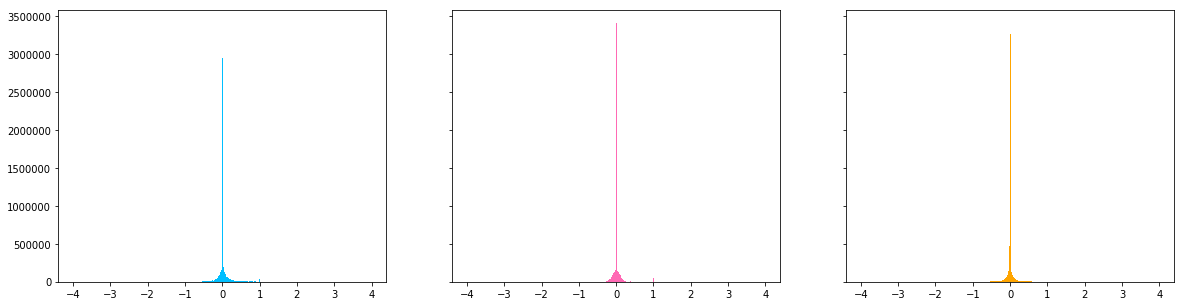

In [25]:
_, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(20, 5), sharex=True, sharey=True)
axL.hist(df.a, bins=500, color='deepskyblue', range={-4, 4})
axC.hist(df.b, bins=500, color='hotpink', range={-4, 4})
axR.hist(df.ans, bins=500, color='orange', range={-4, 4})
plt.show()

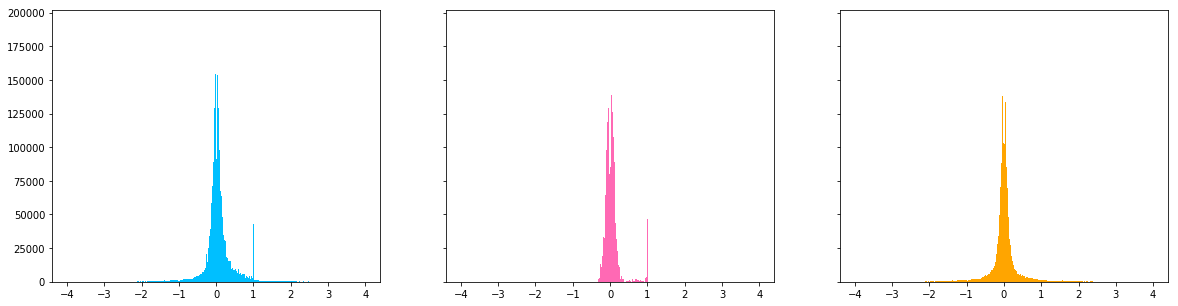

In [15]:
_, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(20, 5), sharex=True, sharey=True)
axL.hist(df[abs(df.a) > 0.01].a, bins=500, color='deepskyblue', range={-4, 4})
axC.hist(df[abs(df.b) > 0.01].b, bins=500, color='hotpink', range={-4, 4})
axR.hist(df[abs(df.ans) > 0.01].ans, bins=500, color='orange', range={-4, 4})
plt.show()

In [16]:
df.loc[:, ['a', 'b', 'ans']].describe()

,a,b,ans
count,5.984460e+06,5.984460e+06,5.984460e+06
mean,3.027907e-02,1.515325e-02,2.895154e-03
std,2.872569e-01,1.270246e-01,2.568116e-01
min,-3.386040e+00,-5.577451e-01,-3.386040e+00
25%,0.000000e+00,0.000000e+00,-7.166575e-04
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.824461e-02,1.000000e-02,5.470420e-04
max,3.673022e+00,2.692619e+00,3.673022e+00


/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


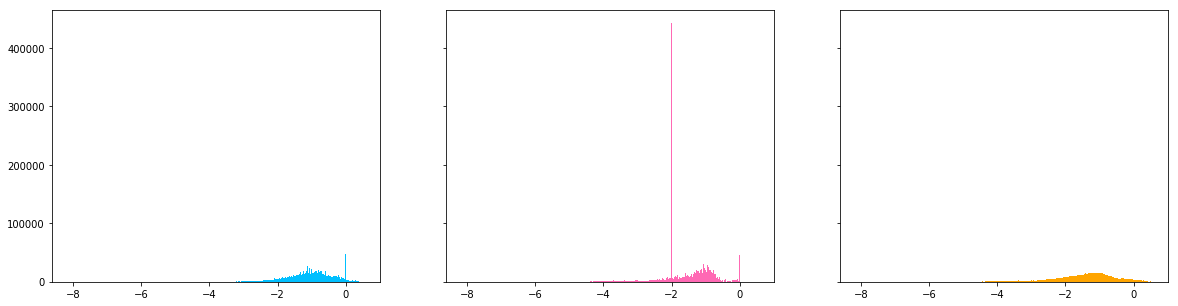

In [17]:
_, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(20, 5), sharex=True, sharey=True)
axL.hist(np.log10(df[df.a != 0].a).dropna(), bins=500, color='deepskyblue')
axC.hist(np.log10(df[df.b != 0].b).dropna(), bins=500, color='hotpink')
axR.hist(np.log10(df[df.ans != 0].ans).dropna(), bins=500, color='orange')
plt.show()

In [18]:
df_add_n = df_add[df_add.a*df_add.b < 0]
df_add_p = df_add[df_add.a*df_add.b > 0]
df_sub_n = df_sub[df_sub.a*df_sub.b < 0]
df_sub_p = df_sub[df_sub.a*df_sub.b > 0]

/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


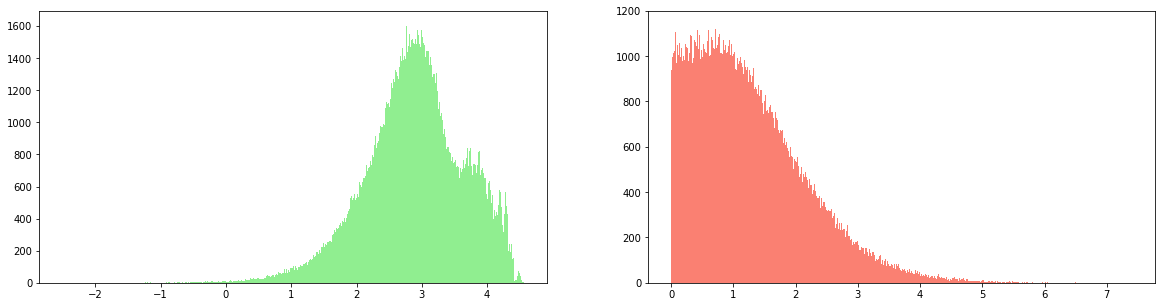

In [19]:
_, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 5))
axL.hist(np.log10((df_add_n.a*10000 + df_add_n.b*10000).append(df_sub_p.a*10000 - df_sub_p.b*10000)).dropna(), bins=500, color='lightgreen')
axR.hist((abs(np.log10(df_add_p.a) - np.log10(df_add_p.b)).append(abs(np.log10(df_sub_n.a) - np.log10(df_sub_n.b)))).dropna(), bins=500, color='salmon')
plt.show()

# Each Function

In [ ]:
# block = []
# before = ''
# for i, d in df.iterrows():
#     if d.function != before:
#         block.append(i)
#         before = d.function

In [20]:
block = [0, 864000, 881280, 1745180, 1745280, 1747270, 1747280, 1747320, 1747330, 1750230,
         1751230, 1752230, 1752240, 1752250, 1752260, 1752360, 3044040, 3476040, 3908040,
         3908140, 3908240, 3908340, 3925620, 5101620, 5965620, 5966370, 5967120, 5984400,
         5984430]

In [21]:
start = block[0]

funcs = []
for end in block[1:]:
    funcs.append((df.function[start], df[start:end]))
    start = end
funcs.append((df.function[start], df[start:]))

Function::conv2d


/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
/home/wakana/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


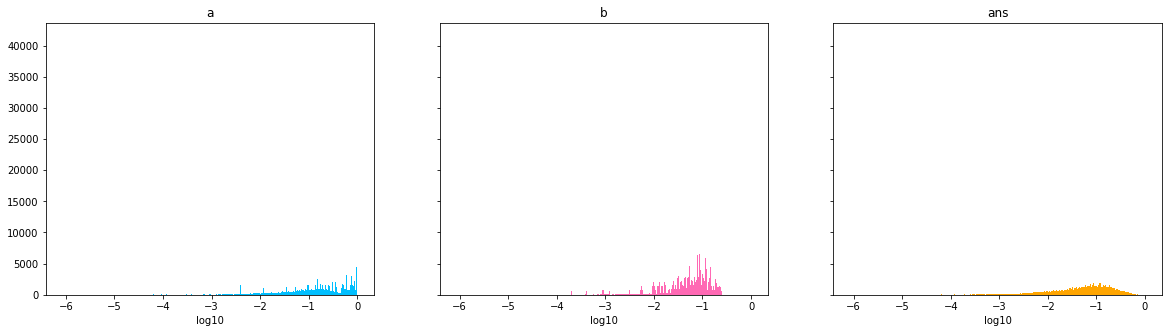

Function::add_bias


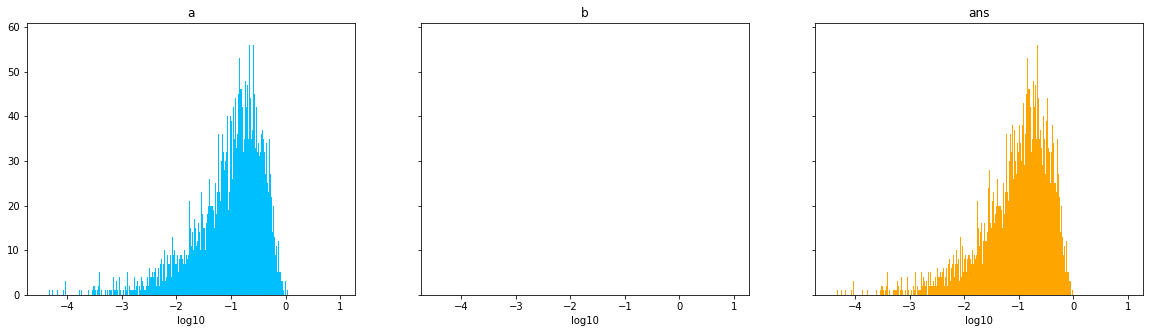

Function::matmul


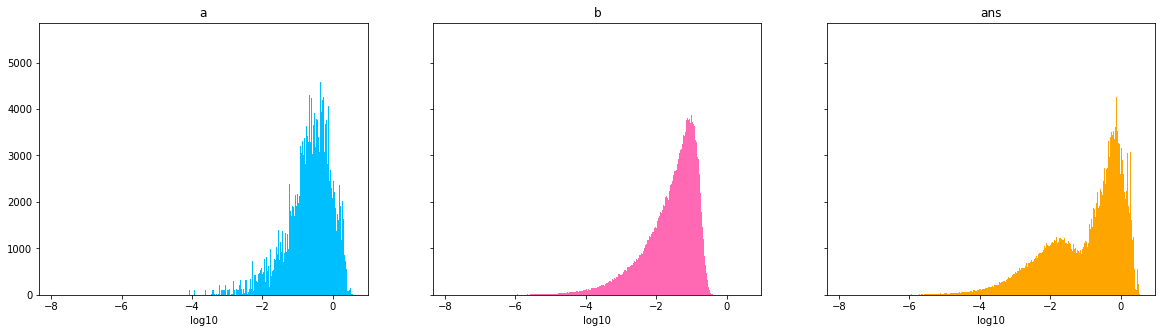

Tensor::operator+


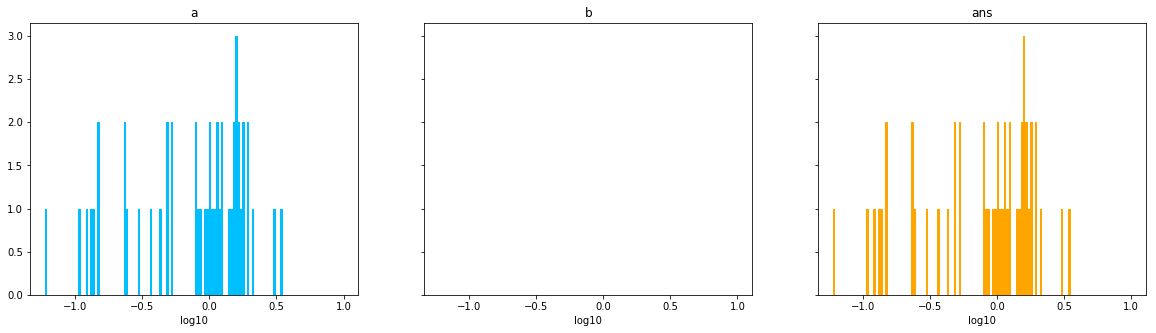

Function::matmul


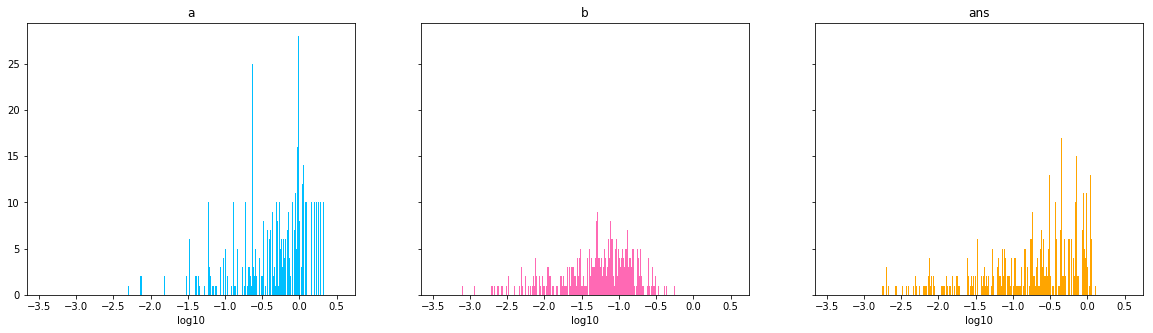

Tensor::operator+


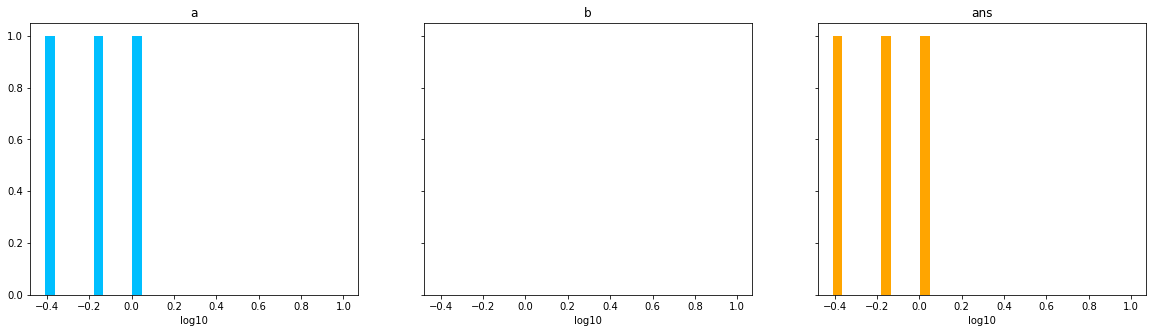

Function::sigmoid


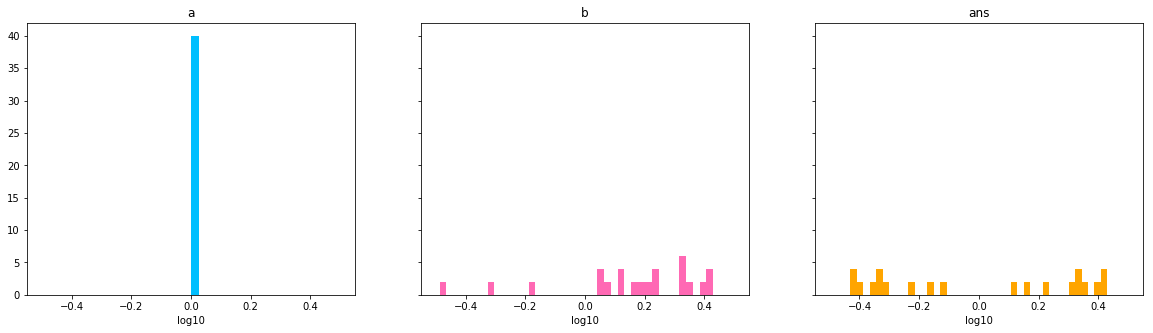

Tensor::operator-


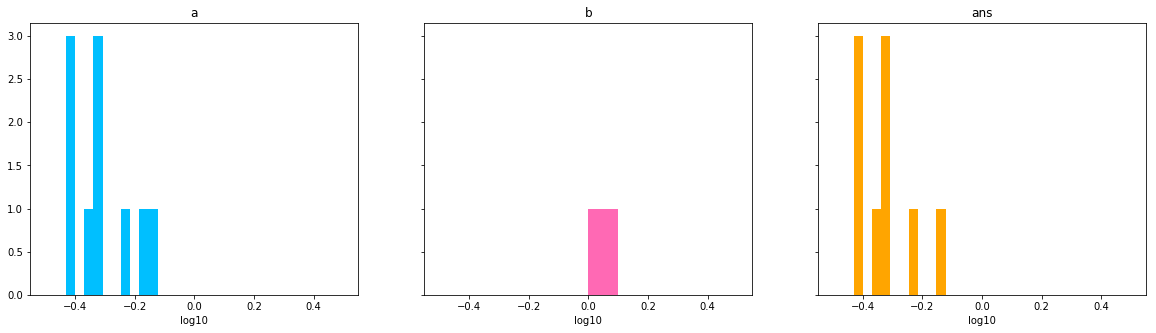

Function::matmul


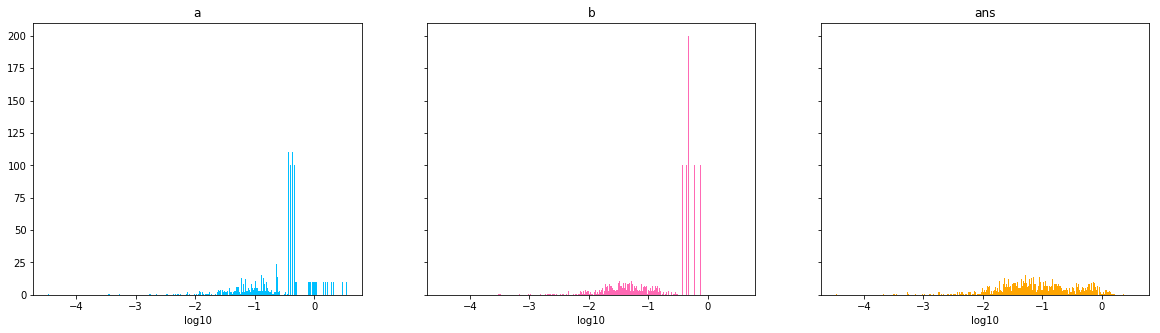

Tensor::times


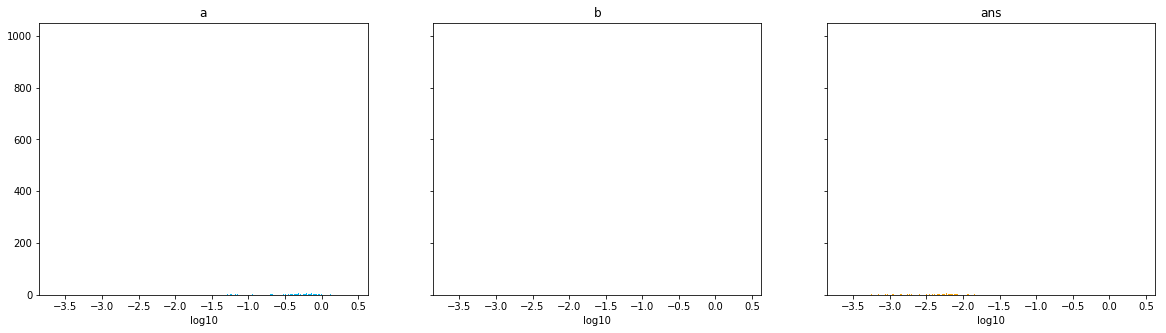

Tensor::operator-


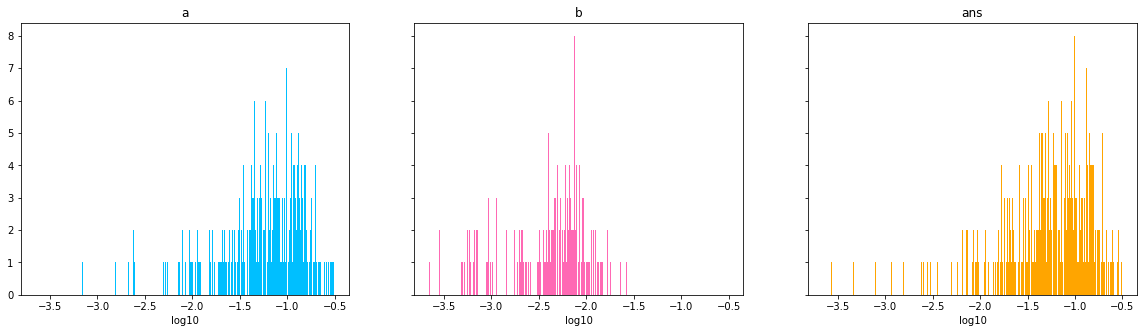

Function::matmul


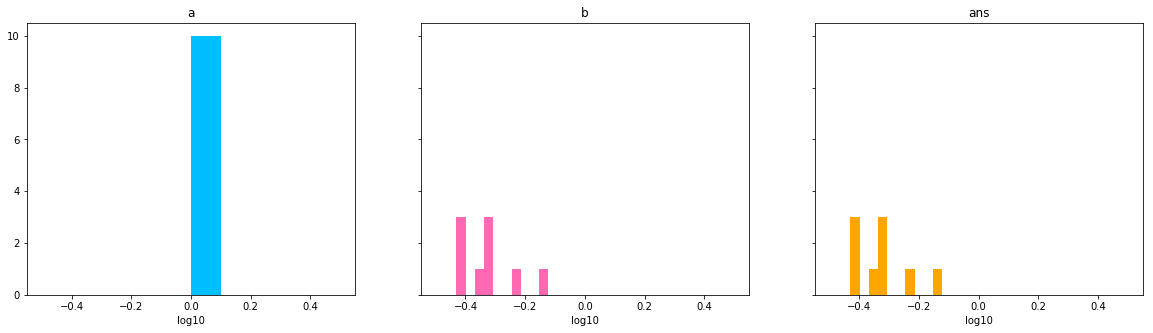

Tensor::times


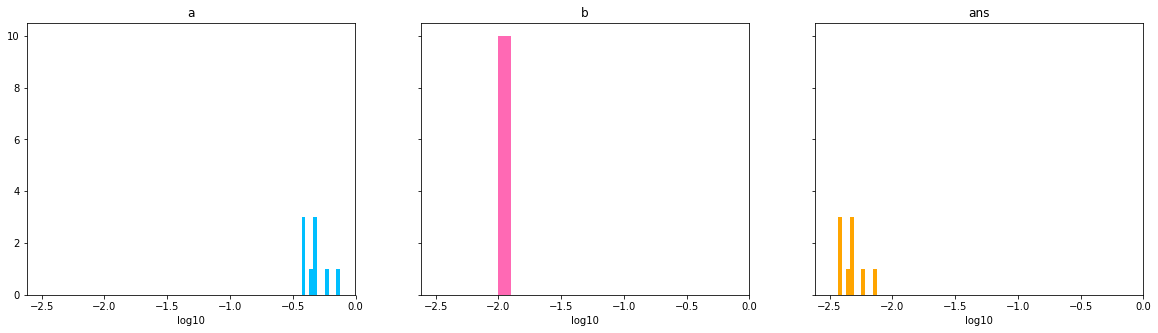

Tensor::operator-


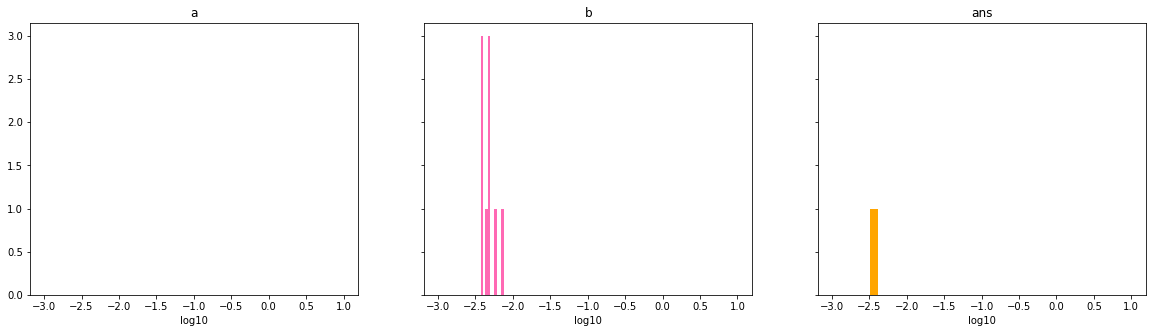

Tensor::operator*


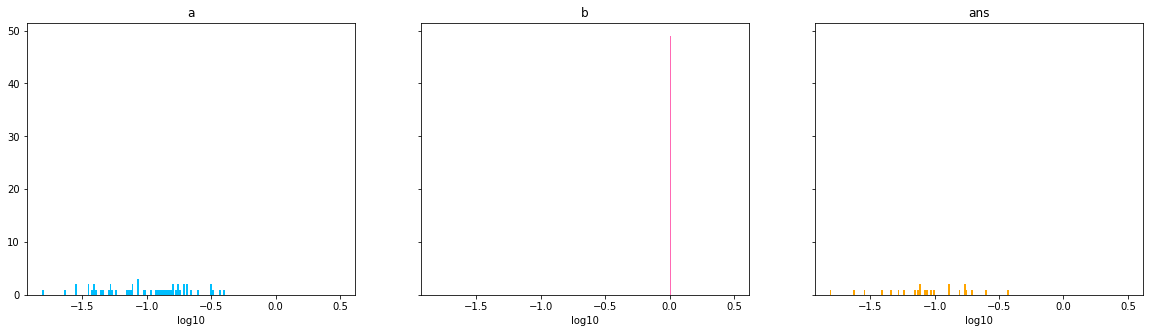

Function::matmul


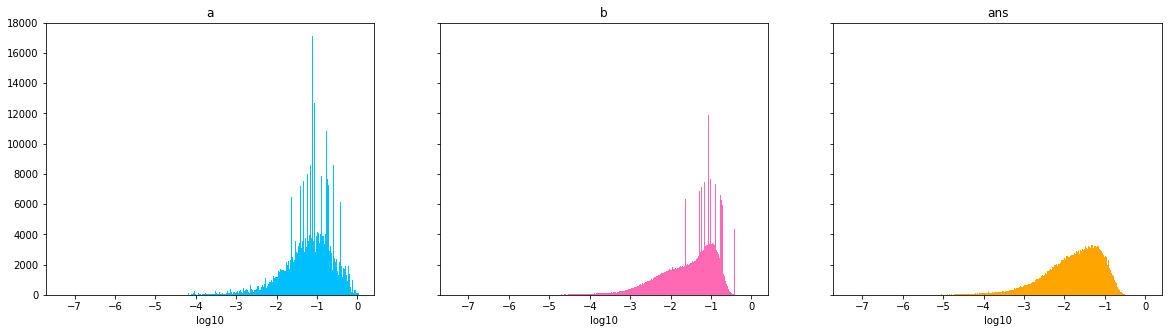

Tensor::times


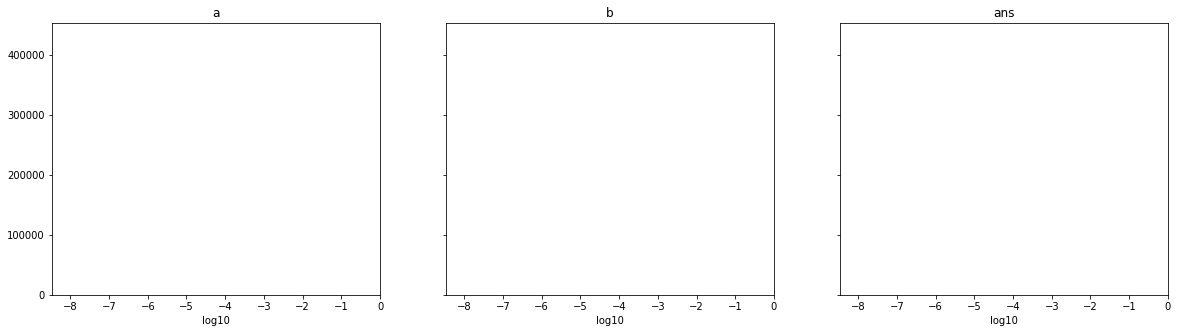

Tensor::operator-


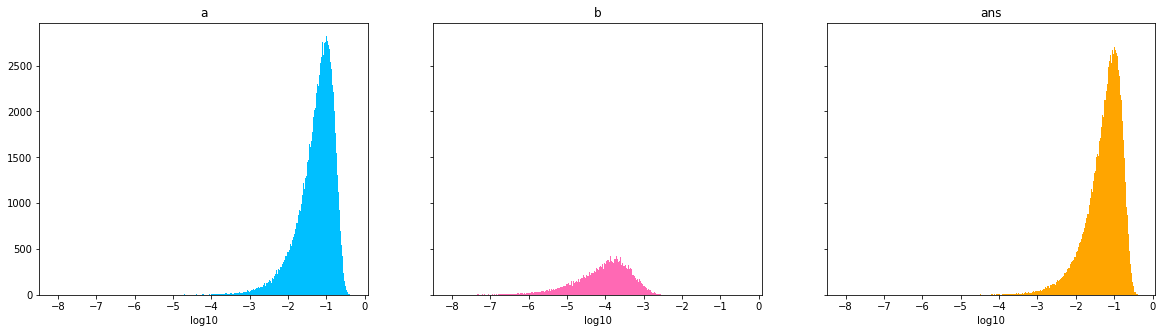

Function::matmul


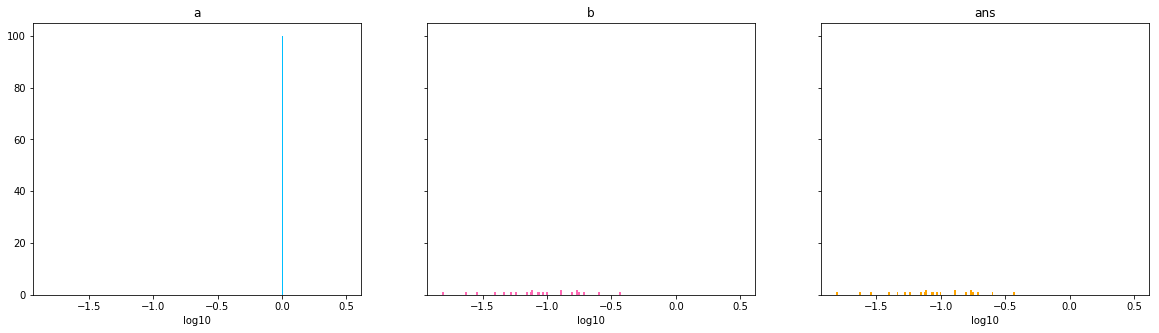

Tensor::times


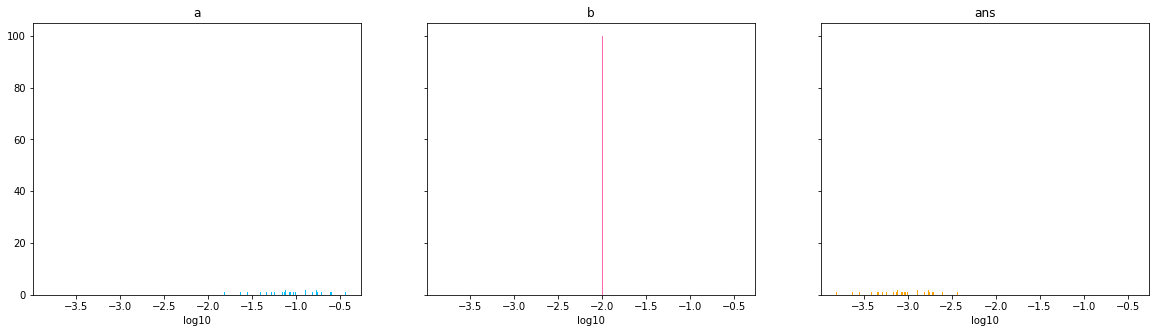

Tensor::operator-


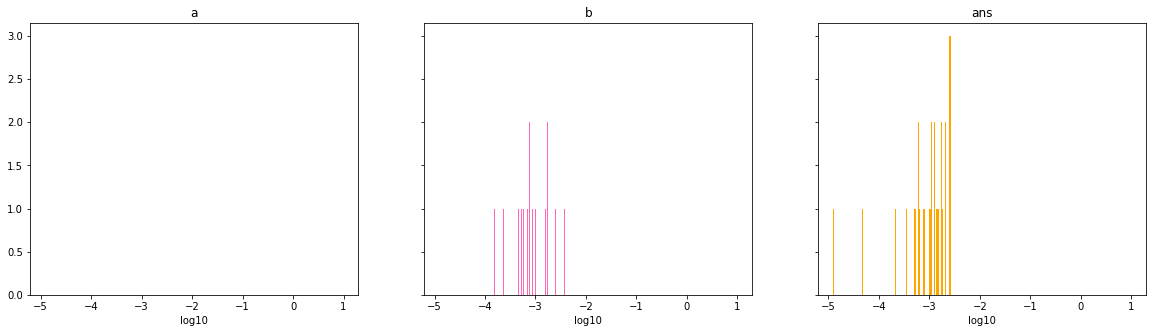

Tensor::operator*


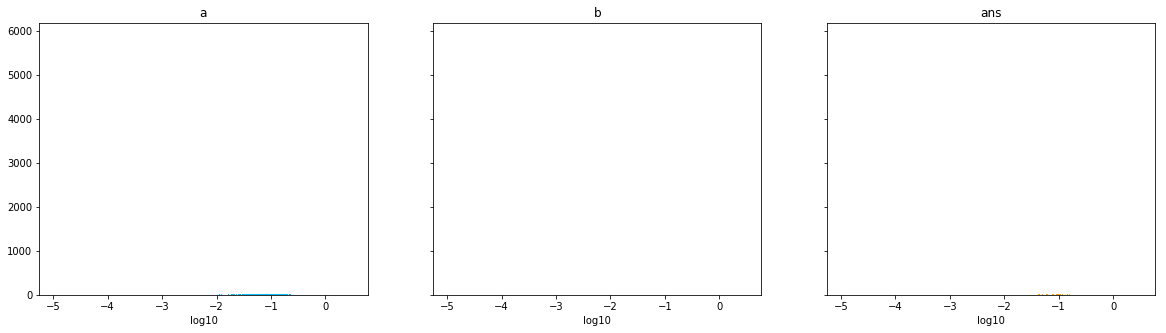

Function::deconv2d


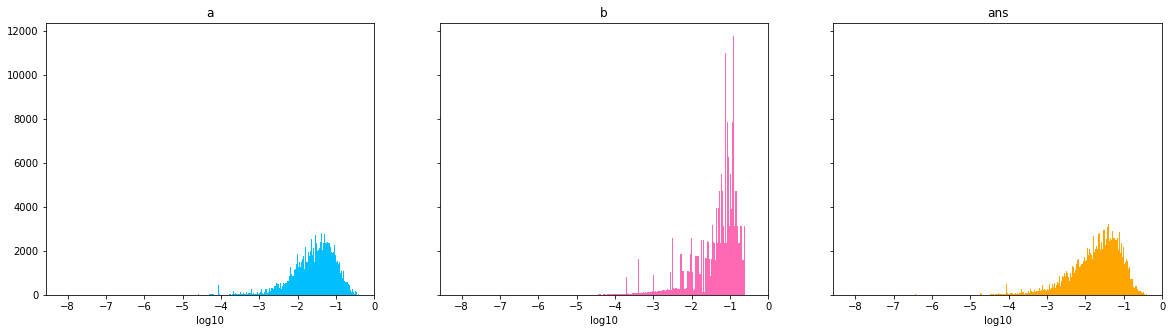

Convolution::update_w


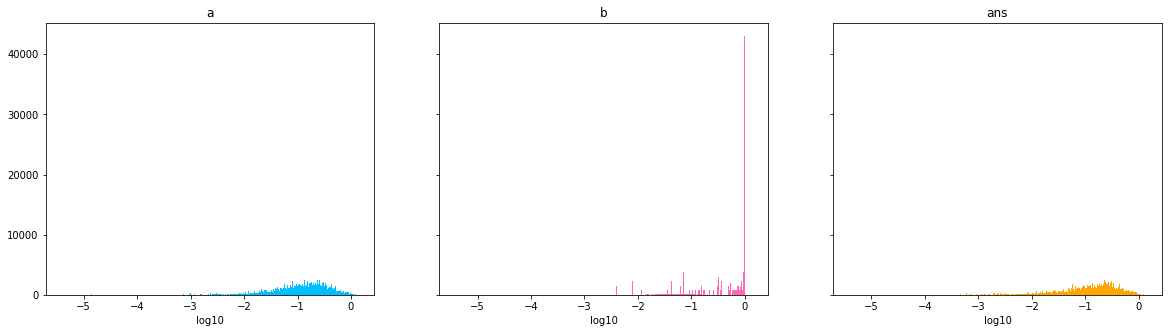

Tensor::times


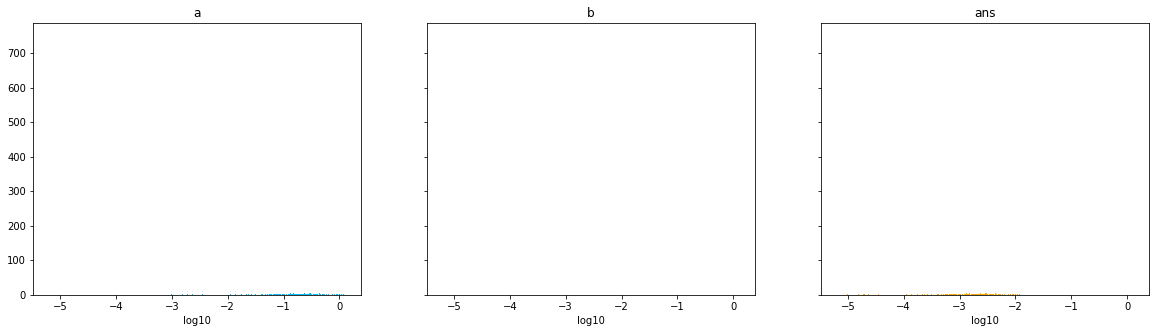

Tensor::operator-


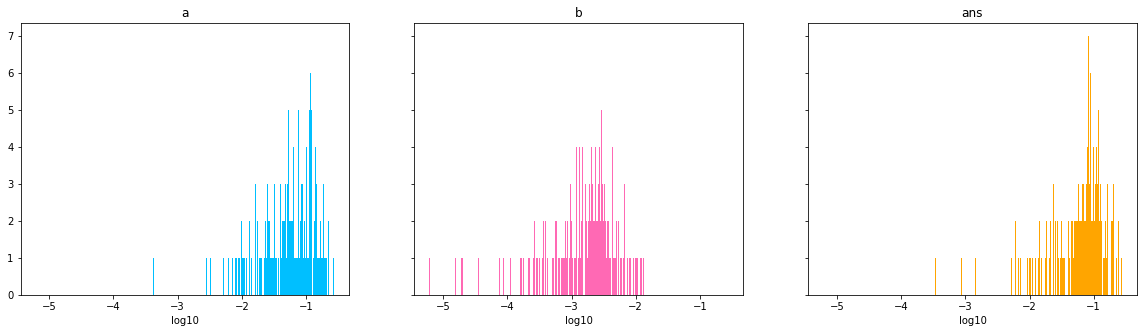

Convolution::update_b


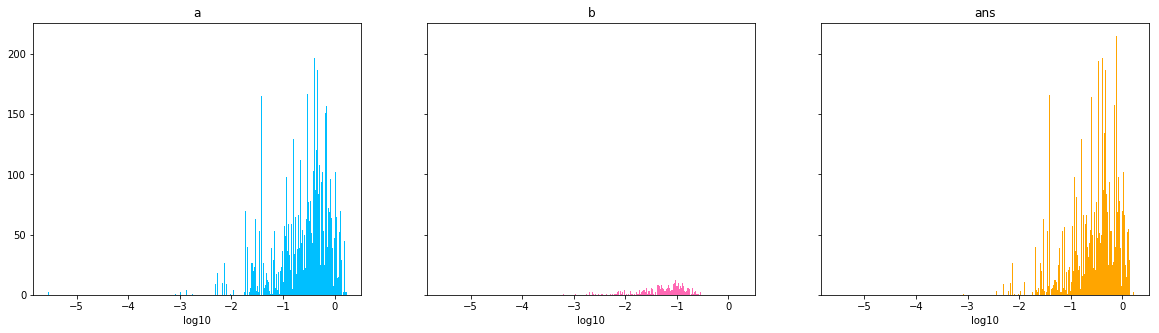

Tensor::times


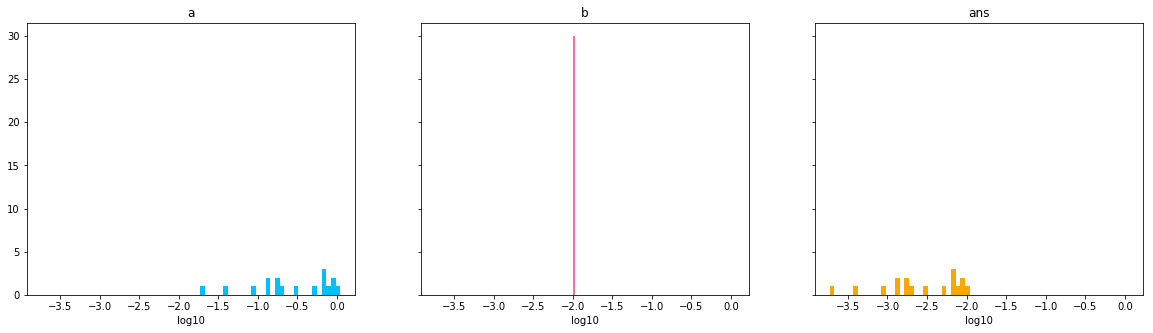

Tensor::operator-


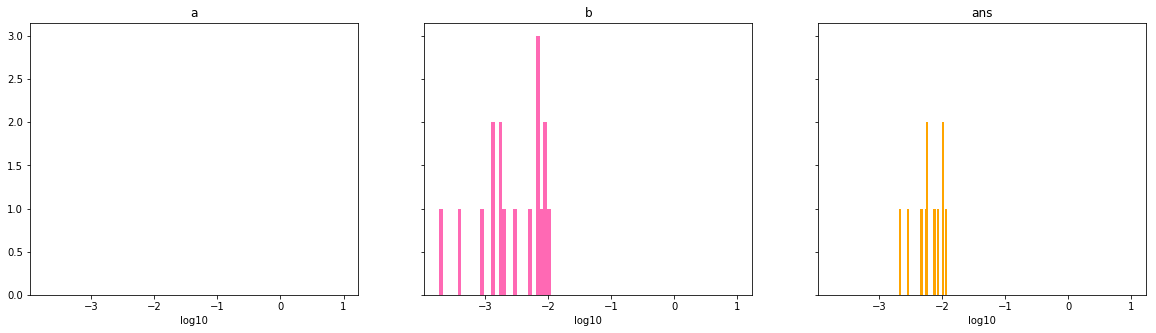

In [23]:
for k, v in funcs:
    print (k)
    _, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(20, 5), sharex=True, sharey=True)
    axL.hist(np.log10(v[v.a != 0].a).dropna(), bins=min(len(v[:]), 500), color='deepskyblue')
    axL.set_title('a')
    axL.set_xlabel('log10')
    
    axC.hist(np.log10(v[v.b != 0].b).dropna(), bins=min(len(v[:]), 500), color='hotpink')
    axC.set_title('b')
    axC.set_xlabel('log10')
    
    axR.hist(np.log10(v[v.ans != 0].ans).dropna(), bins=min(len(v[:]), 500), color='orange')
    axR.set_title('ans')
    axR.set_xlabel('log10')
    plt.show()